<a href="https://colab.research.google.com/github/somilasthana/MachineLearningSkills/blob/master/Analytics_Survival_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
"""
Survival analysis enables the estimation of probability to an event over time. 

survival analysis to help analyze the likelihood of different user segments 

“surviving” to activation. 

Survival Analysis answers questions like
1. What is the expected lifetime of patient given drug A ? Drug B
2. Life expectancy of patience born in India
"""

In [1]:
!pip install lifelines

     |████████████████████████████████| 337kB 5.0MB/s 
     |████████████████████████████████| 24.8MB 62.2MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.3.0
    Uninstalling scipy-1.3.0:
      Successfully uninstalled scipy-1.3.0


In [0]:
%matplotlib inline

import numpy as np
from lifelines import KaplanMeierFitter
from matplotlib import pyplot as plt

from pylab import rcParams

In [0]:
from lifelines.datasets import load_larynx

df = load_larynx()

df['Stage'] = 'Stage I'

df.loc[df['Stage II'] == 1, 'Stage'] = 'Stage II'
df.loc[df['Stage III'] == 1, 'Stage'] = 'Stage III'
df.loc[df['Stage IV'] == 1, 'Stage'] = 'Stage IV'

In [8]:
df.head()
"""
stage: Stage of disease (1=stage 1, 2=stage2, 3=stage 3, 4=stage 4)
time: Time to death or on-study time, months
age: Age at diagnosis of larynx cancer

"""

,time,age,death,Stage II,Stage III,Stage IV,Stage
0,0.6,77,1,0,0,0,Stage I
1,1.3,53,1,0,0,0,Stage I
2,2.4,45,1,0,0,0,Stage I
3,2.5,57,0,0,0,0,Stage I
4,3.2,58,1,0,0,0,Stage I


In [12]:
time_column = 'time'
observation_column = 'death'
kmf = KaplanMeierFitter()
kmf.fit(df[time_column], df[observation_column])

<lifelines.KaplanMeierFitter: fitted with 90 observations, 40 censored>

In [17]:
kmf.survival_function_.head()

,KM_estimate
timeline,
0.0,1.000000
0.1,0.988889
0.2,0.977778
0.3,0.944444
0.4,0.933333


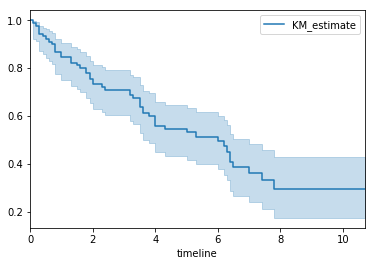

In [15]:
"""
Interpretation 

When we run the estimator across the entire laryngeal cancer sample, 
we can see, on average, that the median time of death is approximately six months. 
"""
print('Median Time of Death ',kmf.median_)
ax = plt.subplot(111)
kmf.plot(ax=ax)

In [23]:
# Group by Stage

group_by = "Stage"
grouped_data = df.groupby([group_by])

d = grouped_data.get_group('Stage IV')
kmf = KaplanMeierFitter()

kmf.fit(d[time_column], d[observation_column], label='Stage IV')
kmf.survival_function_.head()

,Stage IV
timeline,
0.0,1.000000
0.1,0.923077
0.3,0.846154
0.4,0.769231
0.8,0.615385


Median Time of Death  1.5


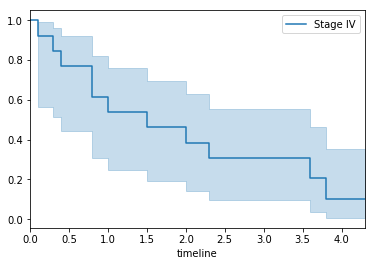

In [24]:
"""
Interpretation
Stage IV laryngeal cancer results in especially accelerated rates of death.
"""
print('Median Time of Death ',kmf.median_)
ax = plt.subplot(111)
kmf.plot(ax=ax)

Median Time of Death  6.0
Median Time of Death  5.0


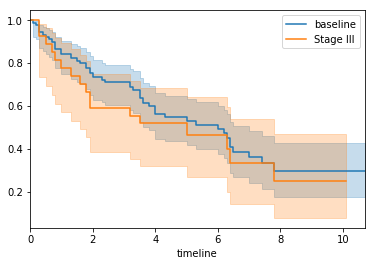

In [26]:
"""
Comparing Base study with Stage III

Stage III has lower probability of survival.
"""
ax = plt.subplot(111)
kmf.fit(df[time_column], df[observation_column], label='baseline')
print('Median Time of Death ',kmf.median_)
kmf.plot(ax=ax)


group_by = "Stage"
grouped_data = df.groupby([group_by])

d = grouped_data.get_group('Stage III')
kmf = KaplanMeierFitter()

kmf.fit(d[time_column], d[observation_column], label='Stage III')
print('Median Time of Death ',kmf.median_)
kmf.plot(ax=ax)